# Chapter 3. The Five Steps of Data Science

## Explore the data

### Dataset 1 – Yelp

In [1]:
import pandas as pd

yelp_raw_data = pd.read_csv("../Data/yelp.csv")

yelp_raw_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [2]:
yelp_raw_data.shape

(10000, 10)

In [3]:
yelp_raw_data.dtypes

business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

In [4]:
yelp_raw_data.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [5]:
type(yelp_raw_data)

pandas.core.frame.DataFrame

In [6]:
yelp_raw_data['business_id'].head() # grabs a single column of the Dataframe

0    9yKzy9PApeiPPOUJEtnvkg
1    ZRJwVLyzEJq1VAihDhYiow
2    6oRAC4uyJCsJl1X0WZpVSA
3    _1QQZuf4zZOyFCvXc0o6Vg
4    6ozycU1RpktNG2-1BroVtw
Name: business_id, dtype: object

In [7]:
type(yelp_raw_data['business_id'])

pandas.core.series.Series

**Nominal level columns**

In [8]:
yelp_raw_data['business_id'].describe()

count                      10000
unique                      4174
top       JokKtdXU7zXHcr20Lrk29A
freq                          37
Name: business_id, dtype: object

In [9]:
yelp_raw_data['review_id'].describe()

count                      10000
unique                     10000
top       0hA3HG4cGDjEP4IFzIKVWw
freq                           1
Name: review_id, dtype: object

In [10]:
yelp_raw_data['text'].describe()

count                                                 10000
unique                                                 9998
top       This review is for the chain in general. The l...
freq                                                      2
Name: text, dtype: object

** Filtering in Pandas **

In [11]:
duplicate_text = yelp_raw_data['text'].describe()['top']
print(duplicate_text)

This review is for the chain in general. The location we went to is new so it isn't in Yelp yet. Once it is I will put this review there as well. We were there on Friday at 5 PM. 

The reason I gave it 2 stars is because the burger was very good and it was made the way I asked for it. My husbands burger was not.

But, the server and the fries left a lot to be desired. Let me preface by saying that we had been to several other locations. I like my fries crispy. I ask for them well done, extra crispy, scorched, tortured hollow tubes. Whatever their buzz word is for well done. The location will comply. EVERY OTHER 5 GUYS HAS COMPLIED. But not the one at TATUM AND SHEA. She said that corporate said they are not to cook the fries that way. So if we were to put up with soggy fries - yes soggy, then we did not want them. 

She also interrupted us several times which is rude. THEN she went and called corporate just to double check for us and she came to the table and said they said no they wer

In [12]:
text_is_the_duplicate = yelp_raw_data['text'] == duplicate_text

In [13]:
type(text_is_the_duplicate) # it is a Series of Trues and Falses

pandas.core.series.Series

In [14]:
text_is_the_duplicate.head() # shows a few Falses out of the Series

0    False
1    False
2    False
3    False
4    False
Name: text, dtype: bool

In [15]:
sum(text_is_the_duplicate) # == 2

2

In [16]:
filtered_dataframe = yelp_raw_data[text_is_the_duplicate] 
# the filtered Dataframe

filtered_dataframe

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
4372,jvvh4Q00Hq2XyIcfmAAT2A,2012-06-16,ivGRamFF3KurE9bjkl6uMw,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0
9680,rIonUa02zMz_ki8eF-Adug,2012-06-16,mutQE6UfjLIpJ8Wozpq5UA,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0


In [17]:
yelp_raw_data['type'].describe()

count      10000
unique         1
top       review
freq       10000
Name: type, dtype: object

In [18]:
yelp_raw_data['user_id'].describe()

count                      10000
unique                      6403
top       fczQCSmaWF78toLEmb0Zsw
freq                          38
Name: user_id, dtype: object

** Ordinal level columns **

In [19]:
yelp_raw_data['stars'].describe()

count    10000.000000
mean         3.777500
std          1.214636
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [20]:
yelp_raw_data['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


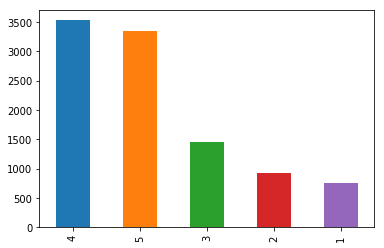

In [22]:
rates = yelp_raw_data['stars'].value_counts()
rates.sort_values()
print(rates.plot(kind='bar'))


In [23]:
yelp_raw_data['date'].describe()

count          10000
unique          1995
top       2011-03-28
freq              21
Name: date, dtype: object

### Dataset 2 – titanic

In [24]:
titanic = pd.read_csv('../Data/original_titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [25]:
titanic.shape

(1309, 14)

In [26]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [27]:
import numpy as np
titanic['sex'] = np.where(titanic['sex'] == 'female', 1, 0)

In [28]:
titanic['sex'].head()

0    1
1    0
2    1
3    0
4    1
Name: sex, dtype: int64

In [29]:
titanic.describe()

,pclass,survived,sex,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,0.355997,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,0.478997,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [30]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [31]:
print(sum(titanic['age'].isnull()))

average_age = titanic['age'].mean() # get the average age

titanic['age'].fillna(average_age, inplace = True) #use the fillna method to remove null values

print(sum(titanic['age'].isnull())) # == 0 missing values

263
0


In [32]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [33]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [34]:
titanic.groupby('sex')['age'].mean()

sex
0    30.430712
1    28.886950
Name: age, dtype: float64